In [1]:
import pandas as pd

In [27]:
df = pd.read_csv(filepath_or_buffer='data.txt', sep=' ', header=None)

x = list(map(float, df[0].values))
y = list(map(float, df[1].values))
label = list(map(int, df[2].values))

In [50]:
x1 = x[0:50]
y1 = y[0:50]
label1 = label[0:50]

x2 = x[50:100]
y2 = y[50:100]
label2 = label[50:100]

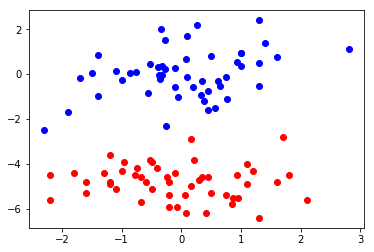

In [51]:
import matplotlib.pyplot as plt

plt.plot(x1, y1, 'bo')
plt.plot(x2, y2, 'ro')

In [55]:
import numpy as np

def linear(t, x):
    return t[0] + t[1]*x[0] + t[2]*x[1]

def sigm(x):
    return 1. / (1 + np.e ** -x)

def plot_linear(t, x):
    return (t[0] + t[1]*x) / (-1. / t[2])

In [56]:
t = np.random.uniform(-0.01, 0.01, 3)

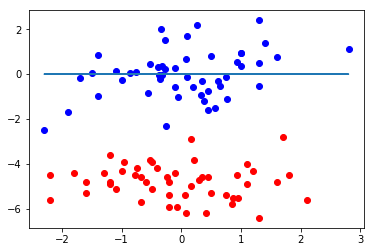

In [62]:
plt.plot(x1, y1, 'bo')
plt.plot(x2, y2, 'ro')

liny = [plot_linear(t, m) for m in x]

plt.plot(x, liny)

In [66]:
def sgd(t, x, y, label, lr):
    nt = t
    for i in range(100):
        tmpx = [x[i], y[i]]
        for j in range(3):
            nt[j] = t[j] + lr * (label[i] - sigm(linear(t, tmpx))) # add x multiplier or something
    return nt